## Problem Statement:-
I decided to treat this as a classification problem by creating a new binary variable affair (did the woman have at least one affair?) and trying to predict the classification for each woman.

The dataset I chose is the affairs dataset that comes with Statsmodels. It was derived from a survey of women in 1974 by Redbook magazine, in which married women were asked about their participation in extramarital affairs. More information about the study is available in a 1978 paper from a Journal of Political Economy.

The dataset contains 6366 observations of 9 variables:

Dataset description:

    rate_marriage: woman's rating of her marriage (1 = very poor, 5 = very good)
    
    age: woman's age
    
    yrs_married: number of years married
    
    children: number of children
    
    religious: woman's rating of how religious she is (1 = not religious, 4 = strongly religious)
    
    educ: level of education (9 = grade school, 12 = high school, 14 = some college, 16 = college graduate, 
    17 = some graduate school, 20 = advanced degree)
    
    occupation: woman's occupation (1 = student, 2 = farming/semi-skilled/unskilled, 3 = "white collar", 
    4 = teacher/nurse/writer/technician/skilled, 5 = managerial/business, 6 = professional with advanced degree)
    
    occupation_husb: husband's occupation (same coding as above)
    
    affairs: time spent in extra-marital affairs

In [2]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from patsy import dmatrices
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split
from sklearn import metrics
from sklearn.cross_validation import cross_val_score

In [3]:
#load the dataset
affairdata = sm.datasets.fair.load_pandas().data
affairdata

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1.400000
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,0.727273
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,4.666666
5,4.0,27.0,9.0,0.0,2.0,14.0,3.0,4.0,4.666666
6,5.0,37.0,23.0,5.5,2.0,12.0,5.0,4.0,0.852174
7,5.0,37.0,23.0,5.5,2.0,12.0,2.0,3.0,1.826086
8,3.0,22.0,2.5,0.0,2.0,12.0,3.0,3.0,4.799999
9,3.0,27.0,6.0,0.0,1.0,16.0,3.0,5.0,1.333333


In [4]:
# add a binary 'affair' column.
affairdata['affair'] = (affairdata.affairs > 0).astype(int)
affairdata

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs,affair
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111,1
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769,1
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1.400000,1
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,0.727273,1
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,4.666666,1
5,4.0,27.0,9.0,0.0,2.0,14.0,3.0,4.0,4.666666,1
6,5.0,37.0,23.0,5.5,2.0,12.0,5.0,4.0,0.852174,1
7,5.0,37.0,23.0,5.5,2.0,12.0,2.0,3.0,1.826086,1
8,3.0,22.0,2.5,0.0,2.0,12.0,3.0,3.0,4.799999,1
9,3.0,27.0,6.0,0.0,1.0,16.0,3.0,5.0,1.333333,1


In [5]:
affairdata.groupby('affair').mean()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
affair,,,,,,,,,
0,4.329701,28.390679,7.989335,1.238813,2.504521,14.322977,3.405286,3.833758,0.000000
1,3.647345,30.537019,11.152460,1.728933,2.261568,13.972236,3.463712,3.884559,2.187243


The above shows that on average, women who have affairs rate their marriages lower, which is to be expected. 

In [6]:
affairdata.groupby('rate_marriage').mean()

,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs,affair
rate_marriage,,,,,,,,,
1.0,33.823232,13.914141,2.308081,2.343434,13.848485,3.232323,3.838384,1.201671,0.747475
2.0,30.471264,10.727011,1.735632,2.330460,13.864943,3.327586,3.764368,1.615745,0.635057
3.0,30.008056,10.239174,1.638469,2.308157,14.001007,3.402820,3.798590,1.371281,0.550856
4.0,28.856601,8.816905,1.369536,2.400981,14.144514,3.420161,3.835861,0.674837,0.322926
5.0,28.574702,8.311662,1.252794,2.506334,14.399776,3.454918,3.892697,0.348174,0.181446


The above shows that increase in age, yrs_married, and children appears to correlate with a declining marriage rating.

Text(0,0.5,'Frequency')

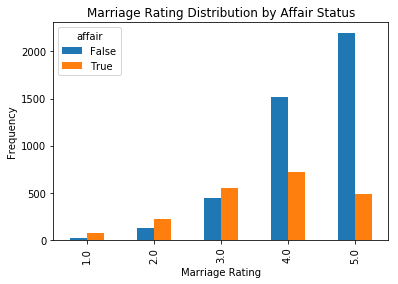

In [7]:
# Finding the distribution of marriage ratings for those having affairs versus those not having 
pd.crosstab(affairdata.rate_marriage,affairdata.affair.astype(bool)).plot(kind='bar')
plt.title('Marriage Rating Distribution by Affair Status')
plt.xlabel('Marriage Rating')
plt.ylabel('Frequency')

Text(0,0.5,'Percentage')

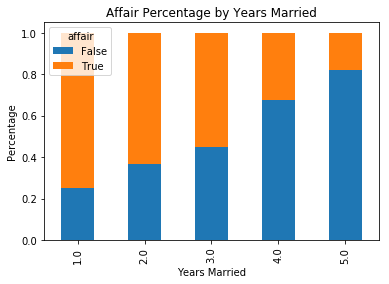

In [8]:
#stacked barplot to look at the percentage of women having affairs by number of years of marriage.
affair_yrs_married = pd.crosstab(affairdata.rate_marriage,affairdata.affair.astype(bool))
affair_yrs_married.div(affair_yrs_married.sum(1).astype(float),axis=0).plot(kind='bar',stacked = True)
plt.title('Affair Percentage by Years Married')
plt.xlabel('Years Married')
plt.ylabel('Percentage')

## Preparing Data for Logistic Regression

In [9]:
# create dataframes with an intercept column and dummy variables for occupation and occupation_husb
y,X = dmatrices('affair~rate_marriage+age+yrs_married+children+religious+educ+C(occupation)+C(occupation_husb)',affairdata,return_type= "dataframe")
print(X.columns)

Index(['Intercept', 'C(occupation)[T.2.0]', 'C(occupation)[T.3.0]',
       'C(occupation)[T.4.0]', 'C(occupation)[T.5.0]', 'C(occupation)[T.6.0]',
       'C(occupation_husb)[T.2.0]', 'C(occupation_husb)[T.3.0]',
       'C(occupation_husb)[T.4.0]', 'C(occupation_husb)[T.5.0]',
       'C(occupation_husb)[T.6.0]', 'rate_marriage', 'age', 'yrs_married',
       'children', 'religious', 'educ'],
      dtype='object')


In [10]:
#renaming column names
X = X.rename(columns={'C(occupation)[T.2.0]':'occ_2',
                      'C(occupation)[T.3.0]':'occ_3',
                      'C(occupation)[T.4.0]':'occ_4',
                      'C(occupation)[T.5.0]':'occ_5',
                      'C(occupation)[T.6.0]':'occ_6',
                      'C(occupation_husb)[T.2.0]':'occ_husb_2',
                      'C(occupation_husb)[T.3.0]':'occ_husb_3',
                      'C(occupation_husb)[T.4.0]':'occ_husb_4',
                      'C(occupation_husb)[T.5.0]':'occ_husb_5',
                      'C(occupation_husb)[T.6.0]':'occ_husb_6'})
print(X.columns)

Index(['Intercept', 'occ_2', 'occ_3', 'occ_4', 'occ_5', 'occ_6', 'occ_husb_2',
       'occ_husb_3', 'occ_husb_4', 'occ_husb_5', 'occ_husb_6', 'rate_marriage',
       'age', 'yrs_married', 'children', 'religious', 'educ'],
      dtype='object')


In [11]:
# flatten y into a 1-D array
y = np.ravel(y)

In [12]:
#splitting  the data into a training set and a testing set.
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=0)
model1= LogisticRegression()
model1.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [13]:
#predict class labels for the test test
predicted = model1.predict(X_test)
predicted

array([1., 0., 0., ..., 0., 0., 0.])

In [14]:
#generate class probabilities
prob = model1.predict_proba(X_test)
prob

array([[0.3514634 , 0.6485366 ],
       [0.90955084, 0.09044916],
       [0.72567333, 0.27432667],
       ...,
       [0.55727385, 0.44272615],
       [0.81207043, 0.18792957],
       [0.74734601, 0.25265399]])

The above shows that the classifier is predicting a 1 (having an affair) any time the probability in the second column is greater than 0.5.

In [15]:
#generate evaluation metrics
print(metrics.accuracy_score(y_test,predicted))
print(metrics.roc_auc_score(y_test,prob[:,1]))

0.7298429319371728
0.745950606950631


The above shows that the accuracy of the model built is 73%.

In [18]:
#Confusion Matrix
print(metrics.confusion_matrix(y_test,predicted))

[[1169  134]
 [ 382  225]]


In [19]:
#Classification report
print(metrics.classification_report(y_test,predicted))

             precision    recall  f1-score   support

        0.0       0.75      0.90      0.82      1303
        1.0       0.63      0.37      0.47       607

avg / total       0.71      0.73      0.71      1910



In [20]:
#Model Evaluation using Cross-Validation
scores = cross_val_score(LogisticRegression(),X,y,scoring='accuracy',cv=10)
scores,scores.mean()

(array([0.72100313, 0.70219436, 0.73824451, 0.70597484, 0.70597484,
        0.72955975, 0.7327044 , 0.70440252, 0.75157233, 0.75      ]),
 0.7241630685514876)

The above shows 73% accuracy

## Predicting the Probability of an Affair

Let's predict the probability of an affair for a random woman not present in the dataset. 
Assume she's a 25-year-old house wife who graduated college, has been married for 3 years, has 1 child, rates herself as strongly religious, rates her marriage as fair, and her husband is a farmer.

In [16]:
A = np.array([1,0,0,1,0,0,1,0,0,0,0,3,25,3,1,4,16])
B = np.reshape(A, (-1, 17))
B

array([[ 1,  0,  0,  1,  0,  0,  1,  0,  0,  0,  0,  3, 25,  3,  1,  4,
        16]])

In [17]:
model1.predict_proba(B)

array([[0.77301478, 0.22698522]])

## Our model predicts that probability of an affair for the given woman is 23%.